# Fitting a Line to Data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.dpi'] = 150

## Linear Least Squares with Matrices

Let's fit a line of the form:

$$
y = \beta_0 x + \beta_1
$$


Assuming that both y and x are vectors with $n$ elements, we can rewrite this equation in matrix form:

\begin{array}{c}
{\left[\begin{array}{c}Y_{1} \\ Y_{2} \\ \vdots \\ Y_{n}\end{array}\right]=\left[\begin{array}{c}\beta_{0}+\beta_{1} X_{1} \\ \beta_{0}+\beta_{1} X_{2} \\ \vdots \\ \beta_{0}+\beta_{1} X_{n}\end{array}\right]} \\ \underbrace{\left[\begin{array}{c}Y_{1} \\ Y_{2} \\ \vdots \\ Y_{n}\end{array}\right]}_{Y_{n \times 1}}=\underbrace{\left[\begin{array}{cc}1 & X_{1} \\ 1 & X_{2} \\ \vdots & \\ 1 & X_{n}\end{array}\right]}_{X_{n \times 2}} \underbrace{\left[\begin{array}{c}\beta_{0} \\ \beta_{1}\end{array}\right]}_{\beta_{2 \times 1}}
\end{array}

$$
Y=X\beta
$$

Here, I'll simulate some data with $n=25$:

In [17]:
# generate some random, linear data with random error
n = 25
x = np.random.uniform(size=n)
y = 2.4*x + 0.3 + np.random.normal(0,0.1,size=n)

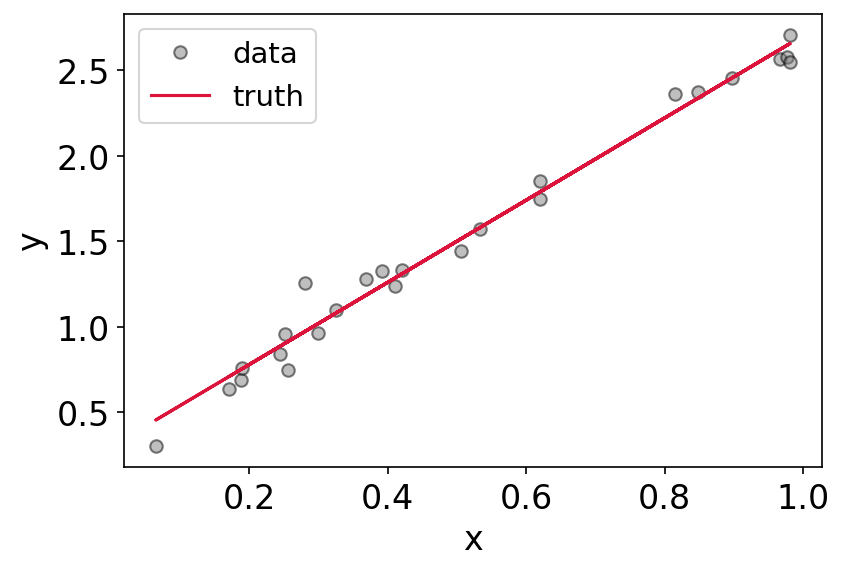

In [18]:
# plot the data
plt.figure()
plt.plot(x,y,'o',label = 'data',mfc='gray',markeredgecolor='k',alpha=0.5)
plt.plot(x,2.4*x + 0.3,label = 'truth',color='crimson')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

We can now directly solve for the vector $\beta$ after reshaping our data to the matrix shapes above:

$$
\hat{\beta}=\left(X^{T} X\right)^{-1} X^{T} Y
$$

In [19]:
# first reshape to make these the proper matrix forms
Y = y.reshape((-1,1)) # 100 x 1
# add a vector of ones as a column to X (see above equation)
vector_of_ones = np.ones(n)
X = np.column_stack((vector_of_ones, x))

In [20]:
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (25, 2)
Y shape:  (25, 1)


In [21]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
print('Beta Shape: ', beta_hat.shape)

Beta Shape:  (2, 1)


In [22]:
beta_hat

array([[0.28472548],
       [2.41884102]])

In [23]:
# generate a best fit line
x_fit = np.linspace(0,1,10)
y_fit = beta_hat[1]*x + beta_hat[0]

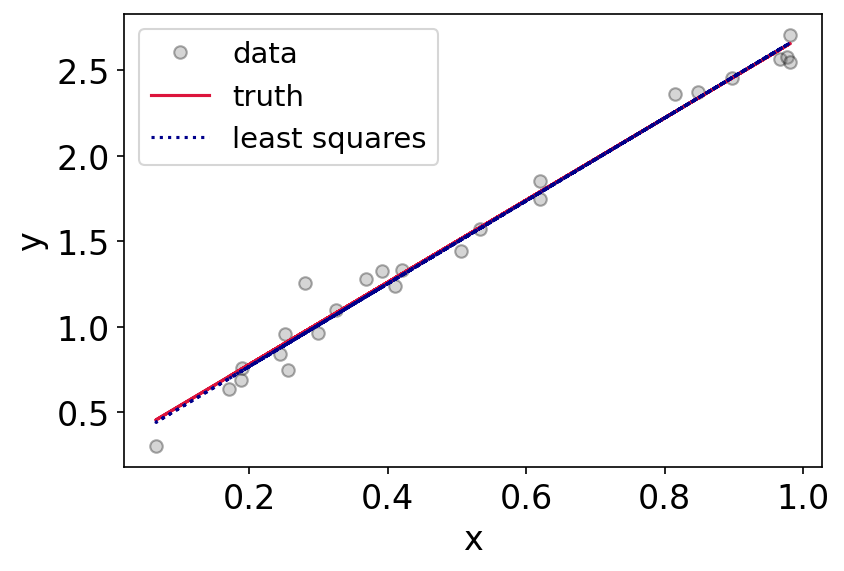

In [24]:
# plot the data, best fit line, and ground truth
plt.figure()
plt.plot(x,y,'o',label = 'data',mfc='gray',markeredgecolor='k',alpha=0.33)
plt.plot(x,2.4*x + 0.3,label = 'truth',c='crimson')
plt.plot(x,y_fit,label='least squares',c='darkblue',ls='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Weighted Least Squares

What if our data have measurement errors which are not constant? How do we weight our points properly?


We can slightly modify our expression for $\beta$ above in the case of known measurement errors. For more math, see Section 2.2 of: https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/24/lecture-24--25.pdf.

Another great resource: https://adrian.pw/blog/fitting-a-line/

The result is that we can define a weight matrix $W = diag(1/\sigma_i)$ where $\sigma_i$ are the measurement errors for the $i$th measurement. In this case, we have:

$$
{\displaystyle {\hat {\boldsymbol {\beta }}}=(X^{\textsf {T}}WX)^{-1}X^{\textsf {T}}W\mathbf {y} .}
$$

In [25]:
# generate some random, linear data with random error
n = 25
x = np.random.uniform(size=n)

# evaluate the true model at the given x values
y = 1.17*x + 0.1

# Heteroscedastic Gaussian uncertainties only in y direction
y_err = np.random.uniform(0.05, 0.15, size=n) # randomly generate uncertainty for each datum
y = np.random.normal(y, y_err) # re-sample y data with noise

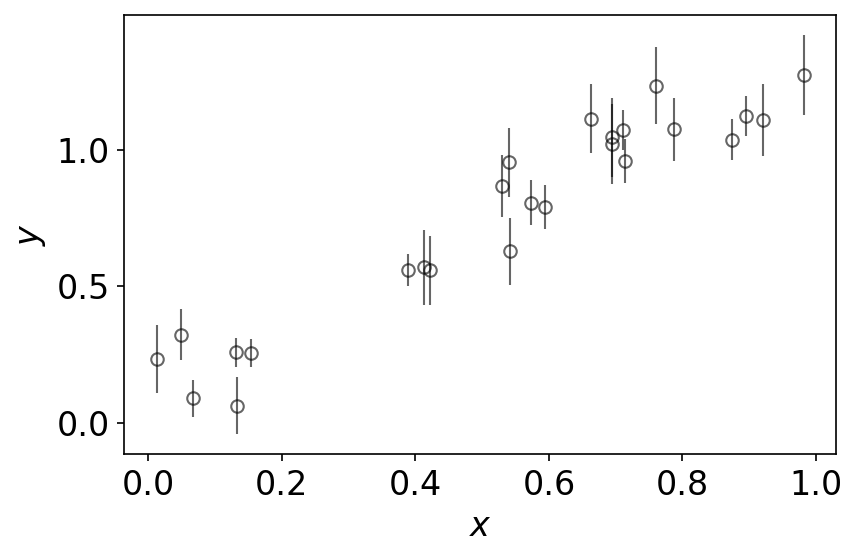

In [26]:
datastyle = dict(mec='k', linestyle='none',ecolor='k', marker='o', mfc='none', label='data',alpha=0.6,elinewidth=1)
plt.figure()
plt.errorbar(x, y, y_err, **datastyle)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()

In [27]:
# solve for beta after defining our matrices
# data matrix
Y = y.reshape((-1,1)) # 50 x 1

# design matrix
vector_of_ones = np.ones(n)
X = np.column_stack((vector_of_ones, x))

# weight matrix
W = np.diag(1/y_err**2)

# solve for beta
beta_hat_weighted = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ Y
beta_hat_unweighted = np.linalg.inv(X.T @ X) @ X.T @ Y

In [28]:
print(f'Weighted Least Squares:\t  y = {np.round(float(beta_hat_weighted[1]),4)}x+{np.round(float(beta_hat_weighted[0]),4)}')
print(f'Unweighted Least Squares: y = {np.round(float(beta_hat_unweighted[1]),4)}x+{np.round(float(beta_hat_unweighted[0]),4)}')


Weighted Least Squares:	  y = 1.224x+0.0931
Unweighted Least Squares: y = 1.2247x+0.1129


In [29]:
# generate a best fit line
x_fit = np.linspace(0,1,10)
y_fit_weighted = beta_hat_weighted[1]*x_fit + beta_hat_weighted[0]
y_fit_unweighted = beta_hat_unweighted[1]*x_fit + beta_hat_unweighted[0]

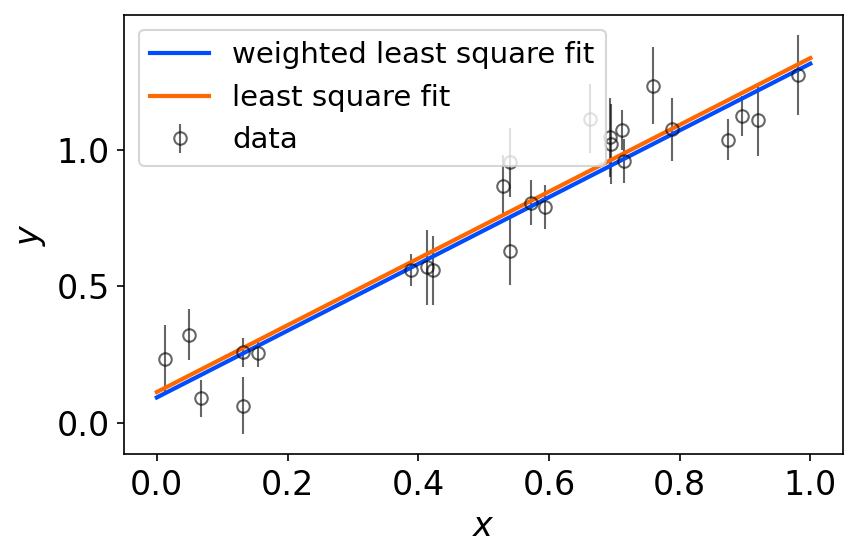

In [30]:
cmap = plt.get_cmap('jet')
dictstlye = dict(mec='k', linestyle='none',ecolor='k', marker='o', mfc='none', label='data',alpha=0.6,elinewidth=1)
plt.figure()
plt.errorbar(x, y, y_err, **dictstlye)
plt.plot(x_fit,y_fit_weighted,color=cmap(0.2/1),label='weighted least square fit',lw=2)
plt.plot(x_fit,y_fit_unweighted,color=cmap(0.8/1),label='least square fit',lw=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left')
plt.tight_layout()